### Importing necessary libraries

main

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow. keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn. model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

In [2]:
print(tf. __version__)

2.17.0


### Defining the path of dataset directory

In [11]:
dataset_path = r"C:\Users\Admin\OneDrive\Desktop\Plant-Disease-Detection-main\data"

### Visualizing the images and Resize images

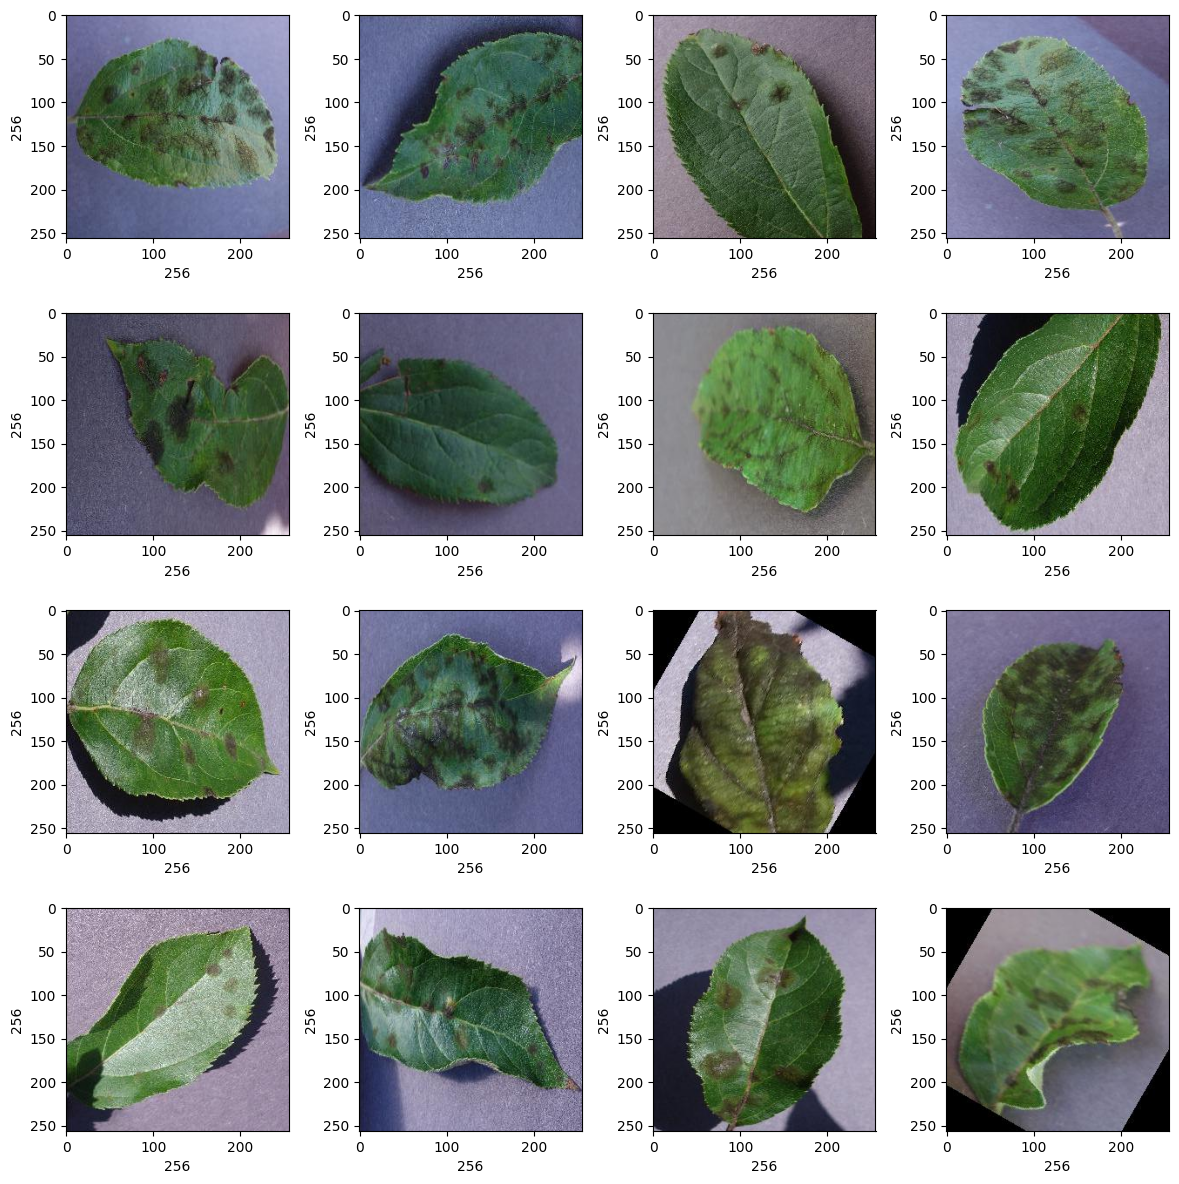

In [12]:
# Plotting 12 images to check dataset

plt.figure(figsize = (12, 12))
dataset_path = r"C:\Users\Admin\OneDrive\Desktop\Plant-Disease-Detection-main\data\Apple___Apple_scab"

for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    rand_img = imread(dataset_path +'/'+ random.choice(sorted(os.listdir(dataset_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10) # width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10) # height of image

### Convert the images into a Numpy array and normalize them

In [13]:
# Converting Images to array 

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256, 256))  
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [15]:
dataset_path = r"C:\Users\Admin\OneDrive\Desktop\Plant-Disease-Detection-main\data"
labels = os.listdir(dataset_path)

print(labels)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy']


In [17]:
dataset_path = r"C:\Users\Admin\OneDrive\Desktop\Plant-Disease-Detection-main\data"
root_dir = listdir(dataset_path)
image_list, label_list = [], []
all_labels = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy']
binary_labels = [0, 1, 2,3,4,5,6,7,8,9]
temp = -1

# Reading and converting image to numpy array

for directory in root_dir:
  plant_image_list = listdir(f"{dataset_path}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dataset_path}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

### Visualize the class count and Check for class imbalance

In [18]:
# Visualize the number of classes count

label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0
0    200
1    200
2    200
3    200
4    200
Name: count, dtype: int64

In [19]:
# it is a balanced dataset as we can see

In [19]:
# Next we will observe the shape of the image.

image_list[0].shape

(256, 256, 3)

In [20]:
# Checking the total number of the images which is the length of the labels list.

label_list = np.array(label_list)
label_list.shape

(2000,)

### Splitting the dataset into train, validate and test sets

In [21]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [22]:
# Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.

x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)

### Performing one-hot encoding on target variable

In [23]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

### Creating the model architecture, compile the model and then fit it using the training data

In [24]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = "same",input_shape = (256, 256, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Conv2D(16, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(8, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
model.summary()

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 85, 85, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │       225,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,410 (903.95 KB)

 Trainable params: 231,410 (903.95 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics = ['accuracy'])

In [26]:
# Splitting the training data set into training and validation data sets

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 10)

In [27]:
# Training the model

epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 56s 4s/step - accuracy: 0.0921 - loss: 2.3003 - val_accuracy: 0.1094 - val_loss: 2.2898
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 4s/step - accuracy: 0.1171 - loss: 2.2821 - val_accuracy: 0.1156 - val_loss: 2.2795
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.1062 - loss: 2.2646 - val_accuracy: 0.1469 - val_loss: 2.2597
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.1083 - loss: 2.2447 - val_accuracy: 0.1406 - val_loss: 2.2434
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - accuracy: 0.1120 - loss: 2.2241 - val_accuracy: 0.1031 - val_loss: 2.2285
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 88s 8s/step - accuracy: 0.1081 - loss: 2.2088 - val_accuracy: 0.0969 - val_loss: 2.2190
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 56s 4s/step - accuracy: 0.1061 - loss: 2.1910 - val_accuracy: 0.1094 - val_loss: 2.2044
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 60s 4s/step - accuracy: 0.1141 - loss: 2.1686 - val_accuracy: 0.1250 - val_loss:

In [31]:
import os
import random
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

# Define the dataset path
dataset_path = r"C:\Users\Admin\OneDrive\Desktop\Plant-Disease-Detection-main\data"

# Plotting 12 images to check dataset
plt.figure(figsize=(12, 12))

# for i in range(1, 17):already in comments from here to height of image
#     plt.subplot(4, 4, i)
#     plt.tight_layout()
#     rand_img = cv2.imread(os.path.join(dataset_path, random.choice(sorted(os.listdir(dataset_path)))))
#     # rand_img = cv2.cvtColor(rand_img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
#     plt.imshow(rand_img)
#     plt.xlabel(rand_img.shape[1], fontsize=10)  # width of image
#     plt.ylabel(rand_img.shape[0], fontsize=10)  # height of image

# Converting Images to array 
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, (256, 256))  
            return img_to_array(image)
        else:
            return np.array([])  # Ensure to return an empty array for non-existing images
    except Exception as e:
        print(f"Error: {e}")
        return None

# Get the list of labels
labels = os.listdir(dataset_path)
print("Labels:", labels)

image_list, label_list = [], []
all_labels = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
              'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight',
              'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy']
binary_labels = list(range(len(all_labels)))  # Creates [0, 1, ..., 9]
temp = -1

# Reading and converting images to numpy array
for directory in labels:
    plant_image_list = os.listdir(os.path.join(dataset_path, directory))
    temp += 1
    for files in plant_image_list:
        image_path = os.path.join(dataset_path, directory, files)
        img_array = convert_image_to_array(image_path)
        if img_array is not None and img_array.size > 0:  # Ensure the image is valid
            image_list.append(img_array)
            label_list.append(binary_labels[temp])

# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
print("Label Counts:\n", label_counts.head())

# Checking the shape of the first image
print("Shape of first image:", image_list[0].shape)

# Convert label list to numpy array
label_list = np.array(label_list)
print("Shape of label list:", label_list.shape)

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)

# Normalize the dataset of images
x_train = np.array(x_train, dtype=np.float16) / 255.0  # Change 225.0 to 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)

# Convert labels to categorical format
y_train = to_categorical(y_train, num_classes=len(all_labels))  # Use 10 for num_classes
y_test = to_categorical(y_test, num_classes=len(all_labels))

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(256, 256, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))  # Increased units for better learning capacity
model.add(Dense(len(all_labels), activation="softmax"))  # Set to 10 for the number of classes
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=10)

# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))


Labels: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy']
Label Counts:
 0
0    200
1    200
2    200
3    200
4    200
Name: count, dtype: int64
Shape of first image: (256, 256, 3)
Shape of label list: (2000,)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 85, 85, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 42, 42, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,612,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,619,610 (13.81 MB)

 Trainable params: 3,619,610 (13.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.0947 - loss: 2.2925 - val_accuracy: 0.1656 - val_loss: 2.2134
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 71s 6s/step - accuracy: 0.2512 - loss: 2.1480 - val_accuracy: 0.2844 - val_loss: 2.1205
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.3753 - loss: 1.9830 - val_accuracy: 0.3812 - val_loss: 1.9140
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.4627 - loss: 1.7890 - val_accuracy: 0.5094 - val_loss: 1.7332
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - accuracy: 0.5933 - loss: 1.5615 - val_accuracy: 0.5969 - val_loss: 1.5746
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 64s 5s/step - accuracy: 0.6359 - loss: 1.3870 - val_accuracy: 0.5562 - val_loss: 1.4593
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.6349 - loss: 1.2958 - val_accuracy: 0.5656 - val_loss: 1.3664
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.6783 - loss: 1.1254 - val_accuracy: 0.5781 - val_loss:

<Figure size 1200x1200 with 0 Axes>

In [38]:
model.save("model\plant_disease_model_sanketh_mini.h5")


<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Admin\AppData\Local\Temp\ipykernel_4228\735803266.py:1: SyntaxWarning: invalid escape sequence '\p'
  model.save("model\plant_disease_model_sanketh_mini.h5")


### Plot the accuracy and loss against each epoch

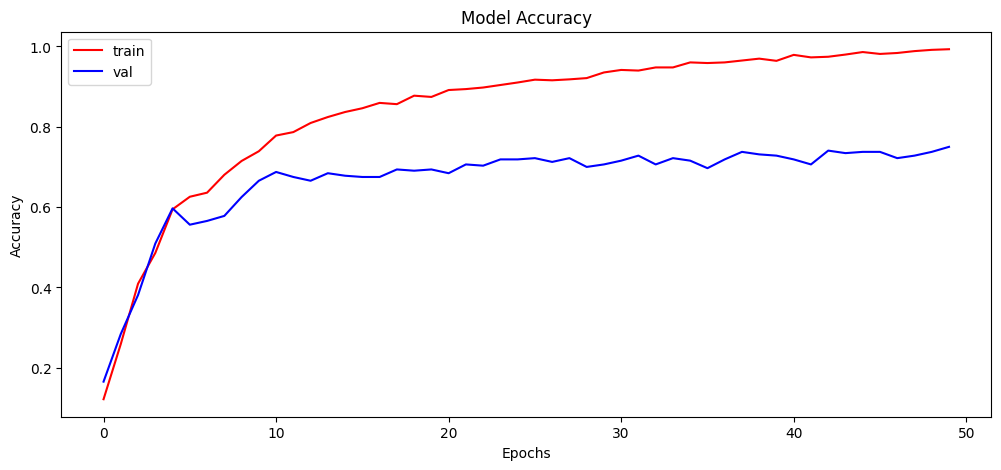

In [35]:
# Plot the training history

plt.figure(figsize = (12, 5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [36]:
print("Calculating model accuracy")

scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1] * 100}")

Calculating model accuracy
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 221ms/step - accuracy: 0.7910 - loss: 0.7275
Test Accuracy: 75.99999904632568


### Make predictions on testing data

In [39]:
y_pred = model.predict(x_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step


### Visualizing the original and predicted labels for the test images

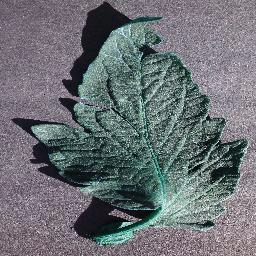

In [40]:
# Plotting image to compare

img = array_to_img(x_test[11])
img

In [41]:
# Finding max value from predition list and comaparing original value vs predicted

print("Originally : ", all_labels[np.argmax(y_test[11])])
print("Predicted : ", all_labels[np.argmax(y_pred[4])])
print(y_pred[2])

Originally :  Tomato___healthy
Predicted :  Apple___healthy
[1.3264356e-04 2.0838209e-04 8.1030441e-05 7.8030728e-04 2.9584871e-07
 3.9032669e-04 5.1637914e-04 9.8409188e-01 1.3798130e-02 5.6864599e-07]


In [45]:
from keras.models import load_model
model = load_model("model\plant_disease_model_sanketh_mini.h5")

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Admin\AppData\Local\Temp\ipykernel_4228\4054449427.py:2: SyntaxWarning: invalid escape sequence '\p'
  model = load_model("model\plant_disease_model_sanketh_mini.h5")


In [46]:
for i in range(50):
    print (all_labels[np.argmax(y_test[i])], " ", all_labels[np.argmax(y_pred [1])])

Apple___Apple_scab   Tomato___Bacterial_spot
Tomato___Early_blight   Tomato___Bacterial_spot
Tomato___Bacterial_spot   Tomato___Bacterial_spot
Apple___Apple_scab   Tomato___Bacterial_spot
Potato___healthy   Tomato___Bacterial_spot
Tomato___healthy   Tomato___Bacterial_spot
Apple___Cedar_apple_rust   Tomato___Bacterial_spot
Apple___Cedar_apple_rust   Tomato___Bacterial_spot
Apple___Apple_scab   Tomato___Bacterial_spot
Apple___Cedar_apple_rust   Tomato___Bacterial_spot
Tomato___Early_blight   Tomato___Bacterial_spot
Tomato___healthy   Tomato___Bacterial_spot
Apple___Cedar_apple_rust   Tomato___Bacterial_spot
Apple___healthy   Tomato___Bacterial_spot
Tomato___healthy   Tomato___Bacterial_spot
Apple___Apple_scab   Tomato___Bacterial_spot
Potato___Early_blight   Tomato___Bacterial_spot
Tomato___Early_blight   Tomato___Bacterial_spot
Potato___Late_blight   Tomato___Bacterial_spot
Tomato___Bacterial_spot   Tomato___Bacterial_spot
Apple___healthy   Tomato___Bacterial_spot
Potato___Early_blight